# Ambulance

## Aims:

* Compare people who arrived by ambulance to those who did not

Uses dataset of people who arrived within four hours of known stroke onset.

## Set up

In [1]:
# Import packages and functions
from dataclasses import dataclass
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

# Set max rows when display dataframe
pd.set_option('display.max_rows', 100)

# Linting
%load_ext pycodestyle_magic
%pycodestyle_on

In [2]:
# Set paths and filenames
@dataclass(frozen=True)
class Paths:
    '''Singleton object for storing paths to data and files.'''

    data_path = './../output/'
    data_filename = 'reformatted_data.csv'


paths = Paths()

In [3]:
# Load data
data = pd.read_csv(os.path.join(paths.data_path,
                                paths.data_filename))

## Comparing by whether arrive by ambulance

In [4]:
# Find counts arriving by ambulance or not
arrive_ambulance_stats = (
    data['arrive_by_ambulance']
    .map({0: 'Did not arrive by ambulance', 1: 'Arrived by ambulance'})
    .value_counts(dropna=False)
    .reset_index(name='count'))

# Find proportions
arrive_ambulance_stats['percentage'] = (
    arrive_ambulance_stats['count'] /
    arrive_ambulance_stats['count'].sum()*100)

arrive_ambulance_stats

,index,count,percentage
0,Arrived by ambulance,123839,90.380896
1,Did not arrive by ambulance,13173,9.613995
2,NaN,7,0.005109


Patients who arrived by ambulance typically had:
* More severe strokes (NIHSS)
* Higher discharge disability (Rankin)
* Shorter arrival to scan time
* Similar scan to thrombolysis time and onset to arrival

In [5]:
(data
 .groupby('arrive_by_ambulance')[['onset_to_arrival_time',
                                  'prior_disability',
                                  'discharge_disability',
                                  'stroke_severity',
                                  'arrival_to_scan_time',
                                  'scan_to_thrombolysis_time']]
 .describe()
 .unstack()
 .reset_index(name='value')
 .rename(columns={'level_0': 'variable', 'level_1': 'analysis'})
 .pivot(index=['variable', 'arrive_by_ambulance'],
        columns='analysis', values='value'))

analysis                                        25%    50%    75%     count  \
variable                  arrive_by_ambulance                                 
arrival_to_scan_time      0.0                  27.0   51.0  109.0   13173.0   
                          1.0                  15.0   26.0   50.0  123839.0   
discharge_disability      0.0                   1.0    1.0    3.0   13097.0   
                          1.0                   1.0    3.0    5.0  122908.0   
onset_to_arrival_time     0.0                  59.0  100.0  156.0   13173.0   
                          1.0                  74.0  104.0  149.0  123839.0   
prior_disability          0.0                   0.0    0.0    1.0   13173.0   
                          1.0                   0.0    0.0    2.0  123839.0   
scan_to_thrombolysis_time 0.0                  22.0   34.0   51.0    3024.0   
                          1.0                  19.0   30.0   47.0   37029.0   
stroke_severity           0.0                   1.0    3.0    6.0   13173.0   
                          1.0                   3.0    6.0   14.0  123839.0   

analysis                                            max        mean  min  \
variable                  arrive_by_ambulance                              
arrival_to_scan_time      0.0                   87883.0  149.006073  1.0   
                          1.0                  440117.0   93.860625  1.0   
discharge_disability      0.0                       6.0    1.787127  0.0   
                          1.0                       6.0    2.918728  0.0   
onset_to_arrival_time     0.0                     240.0  109.195020  1.0   
                          1.0                     240.0  114.308756  1.0   
prior_disability          0.0                       5.0    0.551431  0.0   
                          1.0                       5.0    1.098467  0.0   
scan_to_thrombolysis_time 0.0                     318.0   41.118056  0.0   
                          1.0                     656.0   36.795998  0.0   
stroke_severity           0.0                      42.0    5.096257  0.0   
                          1.0                      42.0    9.326149  0.0   

analysis                                               std  
variable                  arrive_by_ambulance               
arrival_to_scan_time      0.0                  1311.917713  
                          1.0                  1540.675959  
discharge_disability      0.0                     1.656527  
                          1.0                     2.010143  
onset_to_arrival_time     0.0                    61.929199  
                          1.0                    51.890416  
prior_disability          0.0                     1.016655  
                          1.0                     1.433088  
scan_to_thrombolysis_time 0.0                    30.193328  
                          1.0                    28.463958  
stroke_severity           0.0                     6.087541  
                          1.0                     8.361657

Patients who arrived by ambulance...
* Lower proportion had infarction
* Higher proportion thrombolysed

In [6]:
# Convert from 0/1 to False/True
amb_compare_cols = ['thrombolysis', 'infarction']
amb_compare = data[amb_compare_cols] == 1

# Add whether arrived by ambulance
amb_compare['arrive_by_ambulance'] = data['arrive_by_ambulance']

# Groupby arrive by ambulance and find proportion == 1
# (e.g. proportion thrombolysed)
(amb_compare
 .groupby('arrive_by_ambulance')
 .agg({i: 'mean' for i in amb_compare_cols}))*100

,thrombolysis,infarction
arrive_by_ambulance,,
0.0,22.956046,89.227966
1.0,29.900920,84.969194


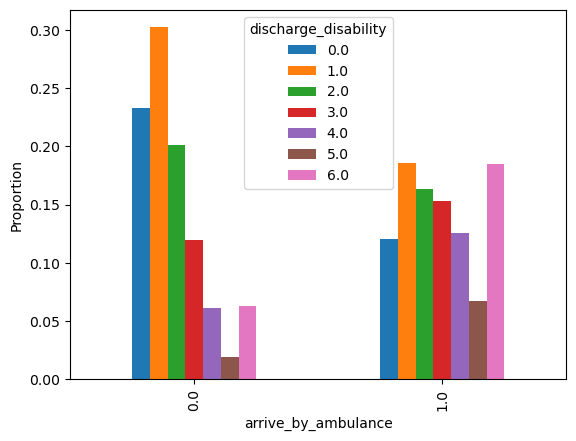

In [7]:
# Create grouped bar plot based on proportions
(data
 .groupby('arrive_by_ambulance')['discharge_disability']
 .value_counts(normalize=True)
 .unstack('discharge_disability')
 .plot.bar())
plt.ylabel('Proportion')
plt.show()